In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

plt.rcParams["figure.figsize"] = (10, 4)
plt.rcParams["axes.grid"] = True


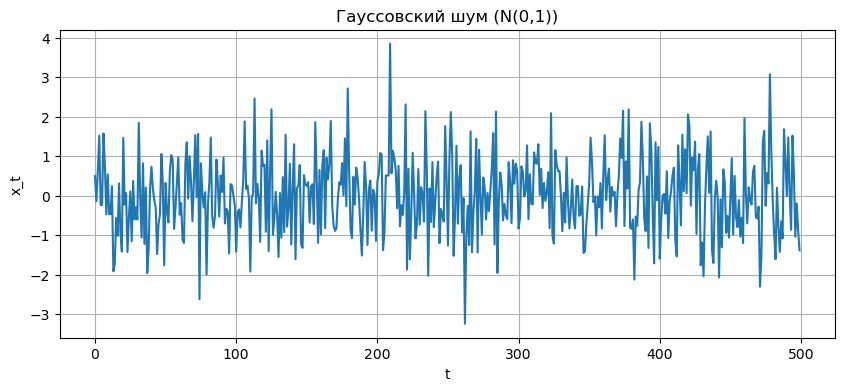

ADF statistic: -22.3438
p-value: 0.000000
Ряд СТАЦИОНАРЕН (p < 0.05)


In [2]:
np.random.seed(42)
n = 500
noise = np.random.normal(loc=0, scale=1, size=n)

plt.plot(noise)
plt.title("Гауссовский шум (N(0,1))")
plt.xlabel("t"); plt.ylabel("x_t")
plt.show()

res = adfuller(noise, autolag="AIC")
print(f"ADF statistic: {res[0]:.4f}")
print(f"p-value: {res[1]:.6f}")
if res[1] < 0.05:
    print("Ряд СТАЦИОНАРЕН (p < 0.05)")
else:
    print("Ряд НЕстационарен (p >= 0.05)")


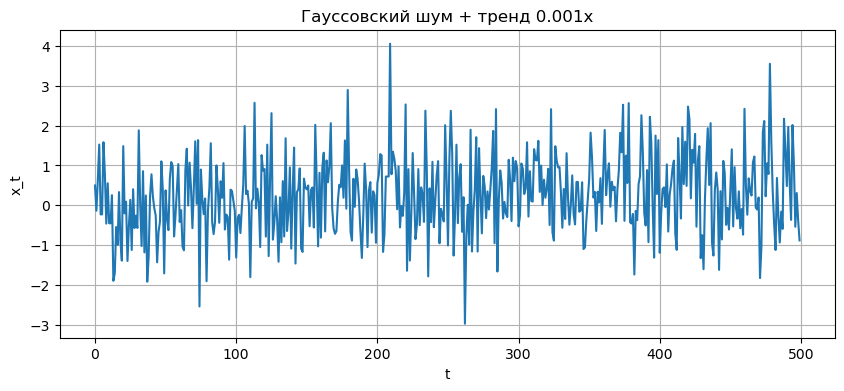

ADF statistic: -21.7302
p-value: 0.000000
Ряд СТАЦИОНАРЕН (p < 0.05)


In [3]:
x = np.arange(n)
trend = 0.001 * x
series_trend = noise + trend

plt.plot(series_trend)
plt.title("Гауссовский шум + тренд 0.001x")
plt.xlabel("t"); plt.ylabel("x_t")
plt.show()

res2 = adfuller(series_trend, autolag="AIC")
print(f"ADF statistic: {res2[0]:.4f}")
print(f"p-value: {res2[1]:.6f}")
if res2[1] < 0.05:
    print("Ряд СТАЦИОНАРЕН (p < 0.05)")
else:
    print("Ряд НЕстационарен (p >= 0.05)")


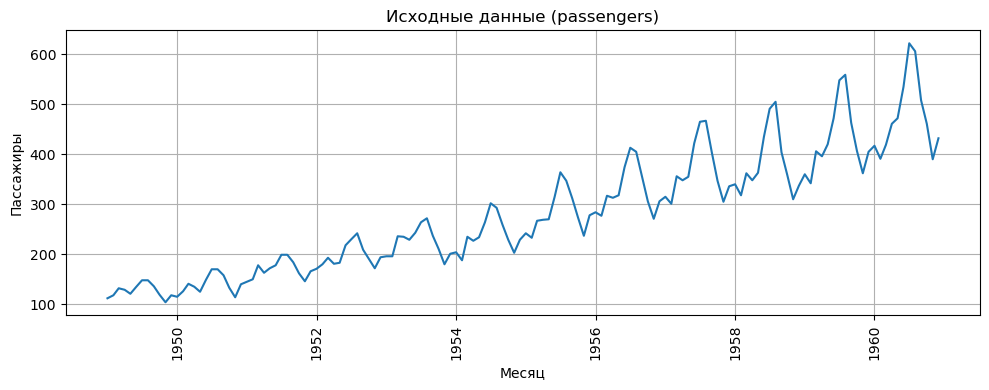

In [8]:
df = pd.read_csv("passengers.csv")
df["Month"] = pd.to_datetime(df["Month"])
df = df.sort_values("Month").reset_index(drop=True).set_index("Month")
df.rename(columns={df.columns[0]: "value"}, inplace=True)

plt.plot(df["value"])
plt.title("Исходные данные (passengers)")
plt.ylabel("Пассажиры"); plt.xlabel("Месяц")
plt.xticks(rotation=90, ha="center")
plt.tight_layout(); plt.show()


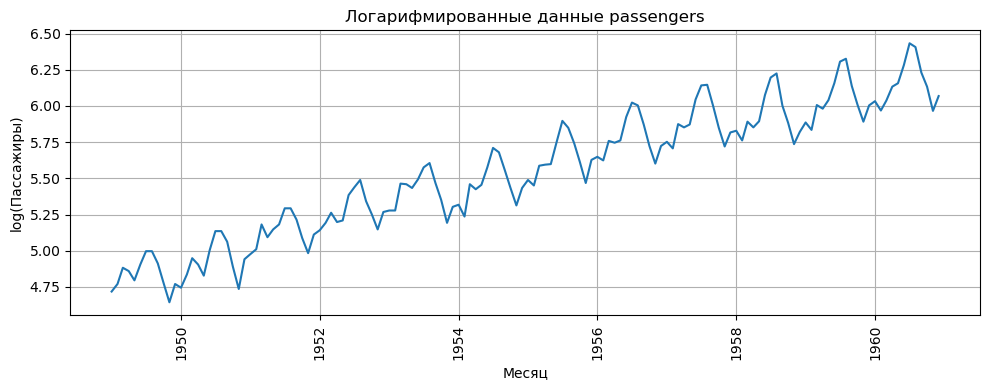

Лог. часть 1: mean=5.0439, var=0.0429
Лог. часть 2: mean=5.5747, var=0.0405
Лог. часть 3: mean=6.0079, var=0.0334


In [9]:
df["log_value"] = np.log(df["value"])

plt.plot(df["log_value"])
plt.title("Логарифмированные данные passengers")
plt.xlabel("Месяц"); plt.ylabel("log(Пассажиры)")
plt.xticks(rotation=90, ha="center")
plt.tight_layout(); plt.show()

split = len(df) // 3
parts_log = [
    df["log_value"].iloc[:split],
    df["log_value"].iloc[split:2*split],
    df["log_value"].iloc[2*split:]
]
for i, p in enumerate(parts_log, 1):
    print(f"Лог. часть {i}: mean={p.mean():.4f}, var={p.var():.4f}")

In [10]:
res_orig = adfuller(df["value"], autolag="AIC")
res_log  = adfuller(df["log_value"], autolag="AIC")

print("== Исходный ряд ==")
print(f"ADF statistic: {res_orig[0]:.4f}, p-value: {res_orig[1]:.6f}")
print("== Логарифмированный ряд ==")
print(f"ADF statistic: {res_log[0]:.4f}, p-value: {res_log[1]:.6f}")

if res_log[1] < 0.05:
    print("После логарифмирования ряд стал ближе к стационарному.")
else:
    print("Даже после логарифмирования ряд остаётся нестационарным.")

== Исходный ряд ==
ADF statistic: 0.8154, p-value: 0.991880
== Логарифмированный ряд ==
ADF statistic: -1.7170, p-value: 0.422367
Даже после логарифмирования ряд остаётся нестационарным.


In [11]:
for reg in ["n", "c", "ct", "ctt"]:
    res_full = adfuller(df["value"], regression=reg, autolag="AIC")
    res_log  = adfuller(df["log_value"], regression=reg, autolag="AIC")
    print(f"\n=== regression='{reg}' ===")
    print(f"Исходный:  ADF={res_full[0]:.4f}, p={res_full[1]:.6f}")
    print(f"Логарифм:  ADF={res_log[0]:.4f},  p={res_log[1]:.6f}")


=== regression='n' ===
Исходный:  ADF=2.3906, p=0.997180
Логарифм:  ADF=2.4833,  p=0.997997

=== regression='c' ===
Исходный:  ADF=0.8154, p=0.991880
Логарифм:  ADF=-1.7170,  p=0.422367

=== regression='ct' ===
Исходный:  ADF=-2.1008, p=0.545659
Логарифм:  ADF=-2.1470,  p=0.519681

=== regression='ctt' ===
Исходный:  ADF=-3.2337, p=0.195942
Логарифм:  ADF=-3.2188,  p=0.201547
